-32


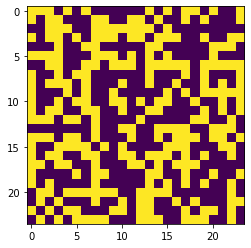

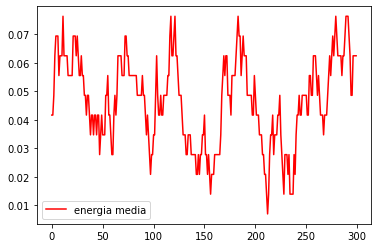

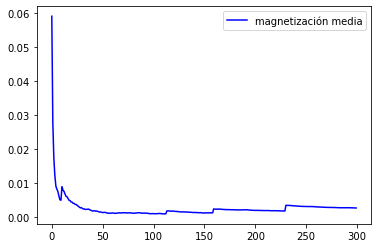

In [16]:
import random as rd
import gmsh
import numpy as np
import copy
import matplotlib.pyplot as plt
J = 1
mu = 1
H = 0
N = 24                                            # Tamaño del sistema → N**2 = cantidad de spins total
S = np.resize(rd.choices([1,-1], k=N**2),(N,N))   # Sistema
#S = np.resize(np.arange(0,N**2),(N,N))
T = 273   # K
kB = 1
B = 1/ (T * kB)
plt.imshow(S)

# Calculo la energía inicial
def energy(S):
    M =0
    E=0
    count=0         #contador que tiene que dar igual a N**2 * 4 / 2 (cada elemento esta relacionado con los 4 primeros vecinos, pero hay que contar una sola vez cada interaccion y divido por dos)
    for j in range(N):
        for i in range(N):
            E-= J * S[j][i] * (S[j][i-1] + S[j-1][i] + mu * H)
            M+= S[j][i]
    return E, M
E, M = energy(S)
        #count+=2
#M =np.sum(S)/(N**2)
print(M)
    
#def MC(S, E, M, N, mu, H, J, T):
kB = 1
B = 1/ (T * kB)
# Evaluación de aceptación o rechazo
Em= []    # Energía media
Mm = []   # Magnetización
for i in range(300):
    # Movimiento aleatorio (giro de algun spin)
    a = int(N*rd.random())
    b = int(N*rd.random())
    # Evaluación de aceptación o rechazo
    dE =2* J * S[a][b] * (S[a][b-1] + S[a-1][b]+ S[a+1-N][b] + S[a][b+1-N] + mu * H)
    if dE < 0:
        S[a][b]*=-1
        E+=dE
        M+=2*S[a][b]
    elif rd.random()< np.exp(-B*dE):
        S[a][b]*=-1
        E+=dE
        M+=2*S[a][b]
    else: 
        M+=M
    Em.append(E/(N**2))
    Mm.append(np.abs(M)/((i+1)*(N**2)))
    #return E/(N**2) , np.abs(M)/((i+1)*(N**2)), S
plt.figure()    
plt.plot(Em, "r", label="energia media")
plt.legend()
plt.figure()
plt.plot(Mm, "b", label="magnetización media")
plt.legend()

        


<ipython-input-1-af95ea8411a8>:53: RuntimeWarning: overflow encountered in long_scalars
  M+=M
<ipython-input-1-af95ea8411a8>:51: RuntimeWarning: overflow encountered in long_scalars
  M+=2*S[a][b]


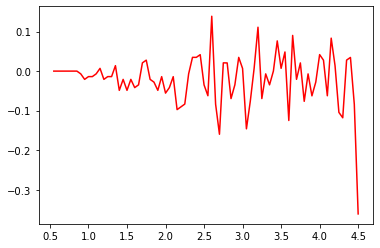

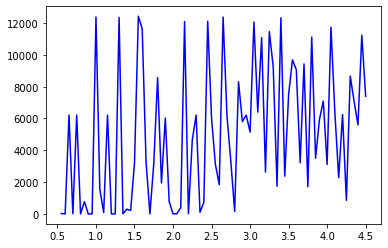

In [2]:
EE = []
MM = []
TT = np.arange(4.5,0.5, -0.05)
for i in TT:
    E, Mi, S= MC(S, E, M, N, mu, H, J, i)
    EE.append(E)
    MM.append(Mi)
plt.figure()
plt.plot(TT, EE, "r")
plt.figure()
plt.plot(TT, MM, "b")

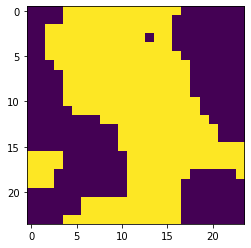

In [3]:

plt.imshow(S)